[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ferit-osirv/lab6/blob/main/lab6.ipynb)


## Lab 6: Feature Detection and Image Retrieval

**This command must be run before starting to do each lab.**

In [2]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab6 clone && cp -a clone/. .

'rm' is not recognized as an internal or external command,
operable program or batch file.


In this lab, you will develop an image retrieval algorithm. Image retrieval involves finding images within a large dataset that match a given query image. For example, if the query image features the Eiffel Tower, the image retrieval algorithm should identify and retrieve all images containing the Eiffel Tower.

**Note:** Depending on your group ID, you will later be assigned a specific landmark to track.

## Resources

Most of the resources required for this assignment can be found in this guide:

[OpenCV Documentation: Feature Detection and Description](https://docs.opencv.org/4.x/db/d27/tutorial_py_table_of_contents_feature2d.html)

**Please read through all sections**. The last two sections will be essential for implementing this assignment.

## Image Retrieval Algorithm

The algorithm will operate as follows:

**Step 1:** Detect features in the query image using **ORB**. Detect features in the search image using **ORB**. You now have a set of features for both images.

**Step 2:** Match the features of the query image to the features of the search image using **FLANN (Fast Approximate Nearest Neighbor Search Library)** with Lowe's ratio test. Thus, matches with a low score will be removed. You now have a set of similar feature matches between the query and search image.

**Step 2:** If there are more than a certain number of matches (e.g. 5) between a query and a search image, we can conclude that the search image contains the landmark. This result is stored as either true or false.

**Algorithm in Pseudocode**

Input: A list of query images featuring a specific landmark, a list of images for searching, some of which contain the landmark and some that do not, and a threshold value (e.g., 10) for the number of matches required to confirm the presence of the landmark in an image.

```python
image_contains_landmark = []
for each image with index i:
  image_contains_landmark[i] = false

for each query image:
  for each image with index i:
    matches = match_features(query, image)
    if matches count > threshold:
      image_contains_landmark[i] = true
```

**Feature Matching**

The feature matching process should proceed in several steps (as explained in the "Feature Matching" section referenced above):

**Step 1:** Conduct feature detection on the query image using **ORB**.

**Step 2:** Perform feature detection on the search image using **ORB**.

**Step 3:** Use **FLANN (Fast Approximate Nearest Neighbor Search Library)** with Lowe's ratio test to match the features of the query and search image.

**Step 4:** Implement **Lowe's ratio test** to retain only features below a certain distance threshold.

**Step 5:** Return the matches that are above the distance threshold.

## Dataset API

The code block below includes helper functions for working with the following dataset:

https://github.com/filipradenovic/revisitop (rparis6k)
published in: Radenović, F., Iscen, A., Tolias, G., Avrithis, Y., & Chum, O. (2018). Revisiting Oxford and Paris: Large-Scale Image Retrieval Benchmarking. 2018 IEEE/CVF Conference on Computer Vision and Pattern Recognition, 5706-5715.

The dataset contains thousands of images of various landmarks in Paris, France. It also contains query images for each landmark, and labels of which landmark is on each image.

**⚠️ Click the ▶️ button to run the cell below.**

In [3]:
import os
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import shutil
import os.path as p

def get_query_img(landmark):
  fname = p.join('images', 'query', landmark + '.jpg')
  img = cv.imread(fname)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  return img

def get_imgs(landmark):
  imgs = []
  folder = p.join('images', landmark)
  for fname in os.listdir(folder):
    if fname.split('.')[-1] != 'jpg':
      continue
    img = cv.imread(p.join(folder, fname))
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    imgs.append(img)
  return imgs

def get_img_fnames(landmark):
  fnames = []
  folder = p.join('images', landmark)
  for fname in os.listdir(folder):
    if fname.split('.')[-1] != 'jpg':
      continue
    fnames.append(p.join(folder, fname))
  return fnames

landmarks = ['eiffel', 'louvre', 'defense', 'moulinrouge', 'invalides']

all_img_fnames = []
for landmark in landmarks:
  all_img_fnames += get_img_fnames(landmark)

num_imgs = len(all_img_fnames)

def get_img_fname(i):
  return all_img_fnames[i]

def get_img(i):
  img = cv.imread(get_img_fname(i))
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  return img

## Groups

Your group number corresponds to the first letter of your first name. **⚠️ Enter your first name below and run the block get your landmark and method.**

In [4]:
# @title  { run: "auto", vertical-output: true }

first_name = "Valentin" # @param {type:"string"}

first_letter = first_name[0].lower()
group_id = 0
if first_letter in 'abcćčdđe':
  group_id = 1
elif first_letter in 'fghij':
  group_id = 2
elif first_letter in 'klmno':
  group_id = 3
elif first_letter in 'pqrsšt':
  group_id = 4
else:
  group_id = 5

assert len(str(group_id)) == 1, "Incorrect group"

landmarks = ['defense', 'louvre', 'moulinrouge', 'invalides', 'eiffel']

assert (group_id - 1) >= 0 and (group_id - 1) < len(landmarks), "Incorrect group"

landmark = landmarks[group_id - 1]
print("Your landmark:", landmark)

Your landmark: eiffel


## Documentation

**Available predefined functions in this notebook**:


 - `get_query_imgs(landmark)` - load a list of query images
   - `landmark` can be `'defense', 'louvre', 'moulinrouge', 'invalides', 'eiffel'`.
 - `get_img(i)` - load the `i`th image from the dataset
 - `get_img_fname(i)` - returns the file name of the image
 - `num_imgs` - the total number of images in the dataset
 - `get_imgs(landmark)` - get all images of a certain landmark, useful for evaluation
 - `get_img_fnames(landmark)` - get all image filenames of a certain landmark, useful for evaluation

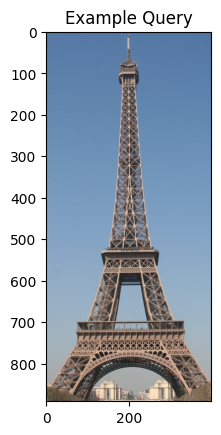

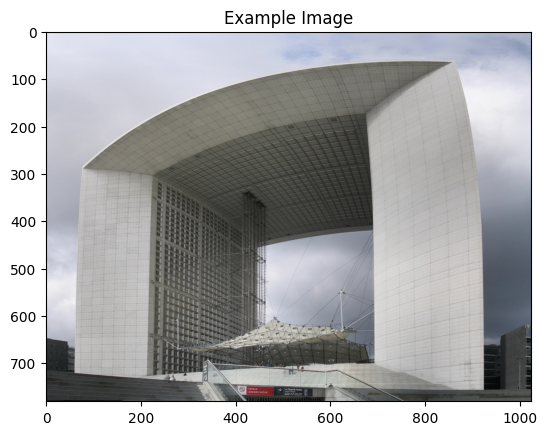

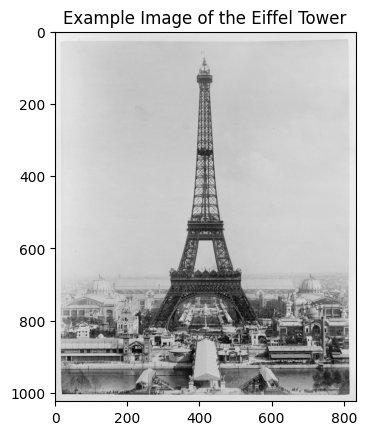

Image 40 images\defense\paris_defense_000002.jpg
All Eiffel images ['images\\eiffel\\paris_eiffel_000000.jpg', 'images\\eiffel\\paris_eiffel_000005.jpg', 'images\\eiffel\\paris_eiffel_000012.jpg', 'images\\eiffel\\paris_eiffel_000021.jpg', 'images\\eiffel\\paris_eiffel_000051.jpg', 'images\\eiffel\\paris_eiffel_000086.jpg', 'images\\eiffel\\paris_eiffel_000098.jpg', 'images\\eiffel\\paris_eiffel_000128.jpg', 'images\\eiffel\\paris_eiffel_000146.jpg', 'images\\eiffel\\paris_eiffel_000174.jpg', 'images\\eiffel\\paris_eiffel_000176.jpg', 'images\\eiffel\\paris_eiffel_000177.jpg', 'images\\eiffel\\paris_eiffel_000266.jpg', 'images\\eiffel\\paris_eiffel_000327.jpg']


In [5]:
# Some example code

query_img = get_query_img('eiffel')
plt.imshow(query_img)
plt.title('Example Query');
plt.show()

example_img = get_img(40)
plt.imshow(example_img)
plt.title('Example Image');
plt.show()

example_eiffel_img = get_imgs('eiffel')[5]
plt.imshow(example_eiffel_img)
plt.title('Example Image of the Eiffel Tower');
plt.show()

print('Image 40', get_img_fname(40))
print('All Eiffel images', get_img_fnames('eiffel'))

## Assignment

In [6]:
print(landmark)

eiffel


## Initial Algorithm Development

For algorithm development, it is faster to only go through known images of that landmark.

Later in the notebook, you will perform the search across all images.

Before you start development here, it might be a good idea to first try implementing feature matching for just one query and one search image. You can then convert that code to a for loop to go through multiple images as in the block below.

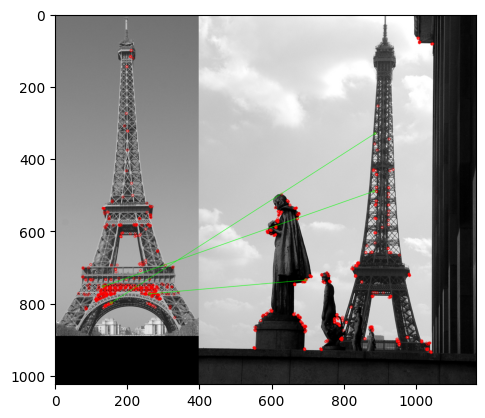

(<matplotlib.image.AxesImage at 0x20f13970b00>, None)

In [7]:
# TODO: Implement ORB by detecting keypoints and computing descriptors
#      for the query and the search image. Match the descriptors
#      using a FLANN-based matcher. Use cv.drawMatchesKnn to
#      visualize the matches. You can use the provided materials as a reference.

query_img = get_query_img(landmark)
search_img = get_imgs(landmark)[0]

query_img = cv.cvtColor(query_img, cv.COLOR_RGB2GRAY)
search_img = cv.cvtColor(search_img, cv.COLOR_RGB2GRAY)
# Note: Detect the features on grayscale images.
FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=50)   # or pass empty dictionary

orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(query_img, None)
kp2, des2 = orb.detectAndCompute(search_img, None)

flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)

matchesMask = [[0, 0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, match in enumerate(matches):
    if len(match) == 2:
        m, n = match
        if m.distance < 0.7 * n.distance:
            matchesMask[i] = [1, 0]

draw_params = dict(matchColor=(0, 255, 0),
                   singlePointColor=(255, 0, 0),
                   matchesMask=matchesMask,
                   flags=cv.DrawMatchesFlags_DEFAULT)

img3 = cv.drawMatchesKnn(query_img, kp1, search_img, kp2, matches, None, **draw_params)

plt.imshow(img3), plt.show()


Next, we can compute the features across all images and store them in a list.

In [8]:
# For this initial phase, we will only go through known landmarks.
# Later in this notebook, we will go through every image in the dataset.
known_landmark_fnames = get_img_fnames(landmark)
known_landmark_imgs = get_imgs(landmark)
query_img = get_query_img(landmark)

query_img = cv.cvtColor(query_img, cv.COLOR_RGB2GRAY)

orb = cv.ORB_create()
query_kp, query_des = orb.detectAndCompute(query_img, None)
query_features = (query_kp, query_des)
detected_features = []
for img in known_landmark_imgs:
  # TODO
  # detect keypoints and descriptors
  img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
  keypoints, descriptors = orb.detectAndCompute(img, None)
  detected_features.append((keypoints, descriptors))

Now that we have a feature for all image, we can go through them and try to match them using FLANN. Take a look at the introduction text and the references to understand how to do this.

In [9]:
matched_fnames = []

FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)

for image_fname, features in zip(known_landmark_fnames, detected_features):
  keypoints, descriptors = features
  # TODO: Perform matching between the query image and the current image using FLANN and ratio test.
  # Note: You might get an error in the line ̨ `kp1, kp2 in matches` if there are no matches.
  # Instead, use `match in matches` and check if `len(matches) < 2`. If so, skip the image.
  # Note: Feel free to change the matches threshold to get better results (capture more matches).
  matches = flann.knnMatch(query_des,descriptors,k=2)

  matchesMask = [[0, 0] for i in range(len(matches))]
  # ratio test as per Lowe's paper
  is_match = False
  for i, match in enumerate(matches):
      if len(match) == 2:
          is_match = True
          m, n = match
          if m.distance < 0.7 * n.distance:
              matchesMask[i] = [1, 0]
  if is_match:
    matched_fnames.append(image_fname)

print('Matched images:', len(matched_fnames))
print('Known matches:', len(known_landmark_fnames))

Matched images: 14
Known matches: 14


Now you have implemented the image matchign process for a limited subset of the data. Next, you will implement the same algorithm for all images in the dataset.

## Run the Algorithm on All Images

In [10]:
# TODO: Implement the specified feature detection method for all images.

query_image = get_query_img(landmark)
query_img = cv.cvtColor(query_image, cv.COLOR_RGB2GRAY)

orb = cv.ORB_create()
query_kp, query_des = orb.detectAndCompute(query_img, None)
img_features = []

FLANN_INDEX_LSH = 6
index_params= dict(algorithm = FLANN_INDEX_LSH,
                   table_number = 6, # 12
                   key_size = 12,     # 20
                   multi_probe_level = 1) #2
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv.FlannBasedMatcher(index_params,search_params)

matched_fnames = []

for i in range(num_imgs):
  img = get_img(i)
  img_fname = get_img_fname(i)
  keypoints, descriptors = orb.detectAndCompute(img, None)
  
  matches = flann.knnMatch(query_des,descriptors,k=2)

  matchesMask = [[0, 0] for i in range(len(matches))]
  # ratio test as per Lowe's paper
  is_match = False

  for i, match in enumerate(matches):
      if len(match) == 2:
          is_match = True
          m, n = match
          if m.distance < 0.8 * n.distance:
              matchesMask[i] = [1, 0]
              matched_fnames.append(image_fname)  
# TODO: Perform matching between the query image and all images using FLANN
print('Matched images:', len(matched_fnames))
print('Known matches:', len(known_landmark_fnames))


Matched images: 2556
Known matches: 14


Now that we have the results on the whole dataset, we can evaluate the performance of the algorithm.

## Evaluation

For evaluation, you will calculate values of the confusion matrix.

https://en.wikipedia.org/wiki/Confusion_matrix

True positives: Landmark is detected by your algorithm and is really a landmark; i.e. landmark is in both `matched_fnames` and `known_landmark_fnames`.

False positives: Landmark is matched by your algorithm but in reality the image does not contain the landmark; i.e. landmark is in `matched_fnames` but not in `known_landmark_fnames`.

In [11]:
# Calculate number of true positives and false positives
#
# True positives: Landmark is in both matched_fnames and known_landmark_fnames
# False positives: Landmark is in matched_fnames but not in known_landmark_fnames

def get_confusion_matrix(matched_fnames, known_landmark_fnames, num_imgs):
  '''
  matched_fnames: Your retrieval results from all images.
  known_landmark_fnames: Known GT landmark names.
  '''
  tp = len(set(matched_fnames) & set(known_landmark_fnames))
  fp = len(set(matched_fnames) - set(known_landmark_fnames))
  fn = len(set(known_landmark_fnames) - set(matched_fnames))
  tn = num_imgs - (tp + fp + fn)
  return (tp, fp, tn, fn)

# Test if confusion matrix works correctly
matched_fnames_test = ['eiffel_0', 'eiffel_1', 'eiffel_2', 'louvre_0']
known_landmark_fnames_test = ['eiffel_0', 'eiffel_1', 'eiffel_2', 'eiffel_3']
# (tp, fp, tn, fn)
test_cm = (3, 1, num_imgs - (3 + 1 + 1), 1)
assert test_cm == get_confusion_matrix(matched_fnames_test, known_landmark_fnames_test, num_imgs),\
  "Your function is not implemented correctly."

In [12]:
# Print the confusion matrix values

tp, fp, tn, fn = get_confusion_matrix(matched_fnames, known_landmark_fnames, num_imgs)
print(f'{tp}\t{fp}')
print(f'{fn}\t{tn}')

1	0
13	110


**Final step:** Try to modify your matches threshold to increase the number of true positives.